### Remap letters
remap letters according to a defined look up table.
#### cracking
Can be cracked by comparing letter frequencies in the corresponding language.

In [35]:
%reset

crypto_remap = {
'a':'g',
'b':'r',
'c':'f',
'd':'o',
'e':'t',
'f':'a',
'g':'q',
'h':'x',
'i':'n',
'j':'u',
'k':'b',
'l':'e',
'm':'m',
'n':'w',
'o':'d',
'p':'l',
'q':'v',
'r':'c',
's':'z',
't':'i',
'u':'k',
'v':'s',
'w':'p',
'x':'h',
'y':'y',
'z':'j'
}

invert_remap = dict([[v,k] for k,v in crypto_remap.items()])


def remaping(message,mode):
    crypto = ''
    for n in range(0,len(message)):

        character = message[n]

        #skip spaces
        if character==' ':
            crypto += character
            continue
        
        if mode=='encrypt':
            crypto += str(crypto_remap.get(character))
        elif mode=='decrypt':
            crypto += str(invert_remap.get(character))
        else:
            print('wrong mode')
            break
    return crypto




text = 'secret message abcdefghijklmnopqrstuvwxyz'
decrypted=remaping(encrypted,'decrypt')
encrypted=remaping(text,'encrypt')

print('original text:\n',text)
print('encrypted text:\n',encrypted)
print('decrypted text:\n',decrypted)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
original text:
 secret message abcdefghijklmnopqrstuvwxyz
encrypted text:
 ztfcti mtzzgqt grfotaqxnubemwdlvcziksphyj
decrypted text:
 secret message abcdefghijklmnopqrstuvwxyz


### Caesar Cipher
All characters of an message are shifted by a constant value.
#### cracking
Can be cracked by comparing letter frequencies in the corresponding language.

In [51]:
#shift between small alphabetic ascii characters (bits: 97-123)
#spaces preserved
#ord() char->bit
#chr() bit->char
%reset

startbit = 97
endbit = 123
reach = endbit - startbit

def caesar(message,shift,mode):
    if shift<0:
        shift+=reach

    crypto = ''
    for n in range(0,len(message)):
        pos = ord(message[n])

        #skip spaces
        if pos==32:
            crypto += chr(pos)
            continue
        
        if shift<0:
            shift+=reach
            
        if mode=='encrypt':
            newpos = ((pos+shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        elif mode=='decrypt':
            newpos = ((pos-shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        else:
            print('wrong mode')
            break
    return crypto




text = 'secret message abcdefghijklmnopqrstuvwxyz'
shift = 5
encrypted = caesar(text,shift,'encrypt')
decrypted = caesar(encrypted,shift,'decrypt')

print('original text:\n',text)
print('positions shifted:\n',shift)
print('encrypted text:\n',encrypted)
print('decrypted text:\n',decrypted)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
original text:
 secret message abcdefghijklmnopqrstuvwxyz
positions shifted:
 5
encrypted text:
 xjhwjy rjxxflj fghijklmnopqrstuvwxyzabcde
decrypted text:
 secret message abcdefghijklmnopqrstuvwxyz


### Trithemius cipher
This cipher uses the caesar cipher and increases the shift by 1 with each character.

In [52]:
#shift between small alphabetic ascii characters (bits: 97-123)
#spaces preserved
#ord() char->bit
#chr() bit->char
%reset


startbit = 97
endbit = 123
reach = endbit - startbit

def trithemius(message,shift,mode):
    crypto = ''
    for n in range(0,len(message)):
        pos = ord(message[n])

        #skip spaces
        if pos==32:
            crypto += chr(pos)
            continue

        shift+=1

        if shift<0:
            shift+=reach

        if mode=='encrypt':
            newpos = ((pos+shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        elif mode=='decrypt':
            newpos = ((pos-shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        else:
            print('wrong mode')
            break
    return crypto




text = 'secret message abcdefghijklmnopqrstuvwxyz'
shift = 5
initial_shift=shift
encrypted = trithemius(text,shift,'encrypt')
decrypted = trithemius(encrypted,shift,'decrypt')

print('original text:\n',text)
print('positions shifted:\n',shift,'+ letter position')
print('encrypted text:\n',encrypted)
print('decrypted text:\n',decrypted)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
original text:
 secret message abcdefghijklmnopqrstuvwxyz
positions shifted:
 5 + letter position
encrypted text:
 ylkaoe yrghqxw tvxzbdfhjlnprtvxzbdfhjlnpr
decrypted text:
 secret message abcdefghijklmnopqrstuvwxyz


### Vigenère cipher

This encryption uses the caesar cipher, but shifts every character by different positions wich are defined in a key. The key gets repeated cyclic and every character in the message gets shifted by the corresponding value in the keyword. This smoothens the letter frequency of the encrypted message.<br>

#### cracking

1. find the lenght of the keyword by comparing the resulting letter frequency of every n-th character.
2. solve n caesar cifers

### One time pad

If the key is equal or longer than the message, than the encrypted message has all characters randomly distributed and is therefore <b>unbrakeable</b>.

In [56]:
#shift between small alphabetic ascii characters (bits: 97-123)
#spaces preserved
#ord() char->bit
#chr() bit->char
%reset


startbit = 97
endbit = 123
reach = endbit - startbit

def vigenere(message,shift,mode):
    crypto = ''
    for n in range(0,len(message)):
        pos = ord(message[n])

        #skip spaces
        if pos==32:
            crypto += chr(pos)
            continue

        shift = keyword[n%len(keyword)]

        if shift<0:
            shift+=reach

        if mode=='encrypt':
            newpos = ((pos+shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        elif mode=='decrypt':
            newpos = ((pos-shift)-startbit)%reach+startbit
            crypto += chr(newpos)
        else:
            print('wrong mode')
            break
    return crypto




text = 'secret message abcdefghijklmnopqrstuvwxyz'
keyword = [13,8,73,38]
encrypted = vigenere(text,keyword,'encrypt')
decrypted = vigenere(encrypted,keyword,'decrypt')

print('original text:\n',text)
print('positions shifted:\n',keyword)
print('encrypted text:\n',encrypted)
print('decrypted text:\n',decrypted)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
original text:
 secret message abcdefghijklmnopqrstuvwxyz
positions shifted:
 [13, 8, 73, 38]
encrypted text:
 fmxdrb yranmtm mokyqsocuwsgyawkceaogieskm
decrypted text:
 secret message abcdefghijklmnopqrstuvwxyz


### letter frequency in english language
values obtained from en.wikipedia.org on 05.05.2019

No handles with labels found to put in legend.


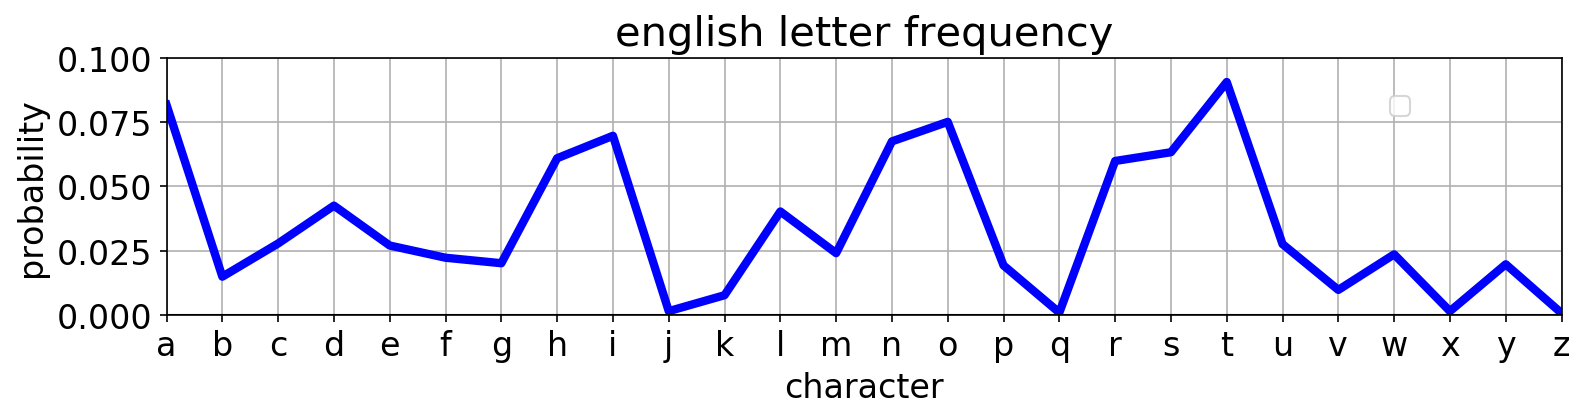

In [59]:
#letter frequency (english)
import numpy as np
import matplotlib.pyplot as plt

letter_frequency = {
'a':0.08167,
'b':0.01492,
'c':0.02782,
'd':0.04253,
'e':0.02702,
'f':0.02228,
'g':0.02015,
'h':0.06094,
'i':0.06966,
'j':0.00153,
'k':0.00772,
'l':0.04025,
'm':0.02406,
'n':0.06749,
'o':0.07507,
'p':0.01929,
'q':0.00095,
'r':0.05987,
's':0.06327,
't':0.09056,
'u':0.02758,
'v':0.00978,
'w':0.02360,
'x':0.00150,
'y':0.01974,
'z':0.00074
}

inverted_dict = dict([[v,k] for k,v in letter_frequency.items()])

#letter_frequency.get('a')
#inverted_dict.get(8.167)


x=np.arange(26)
character=[]
frequency=[]

for i in range(97,123):
    character.append(chr(i))
    frequency.append(letter_frequency.get(chr(i)))


fig = plt.figure(num=None, figsize=(12,5), dpi=150, facecolor='w', edgecolor='k')
ax0=plt.subplot(2,1,1) #2x1 subplots, select 1 plot
#ax1=plt.subplot(2,1,2) #2x1 subplots, select 2 plot

#plot
ax0.plot(x,frequency,color="blue", linewidth=4)
ax0.axhline(0, color='black', lw=1)

#labels
ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('english letter frequency', fontsize=20)
ax0.set_xlabel('character', fontsize=16)
ax0.set_ylabel('probability', fontsize=16)
ax0.tick_params(axis='both', which='major', labelsize=16)

#dimensions & ticks
ax0.set_xticks(x)
ax0.set_xticklabels(tuple(character))
ax0.set_yticks(np.linspace(0,0.1,5))
ax0.set_xlim(0,25)
ax0.set_ylim(0,0.1)
ax0.grid(True)
fig.gca().set_autoscale_on(False)

#show plot
plt.show()